In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense


In [9]:
data=pd.read_csv('D:\\Drive D\\One drive folder\\OneDrive - Higher Education Commission\\Drive G\\Data science coding\\Data sets\\breast_cancer.csv')


In [10]:
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [19]:
data.shape

(569, 31)

Benign 357
Malignanat 212


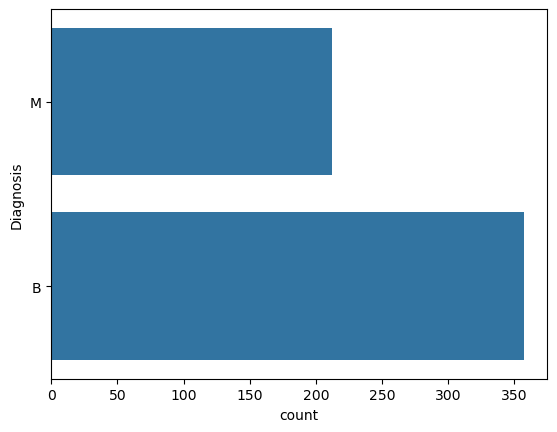

In [16]:
ax=sns.countplot(data['Diagnosis'],label="Count")
B,M=data['Diagnosis'].value_counts()
print('Benign',B)
print('Malignanat',M)

In [18]:
# find missing values
data.isnull().sum()


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [23]:
X=data.iloc[ : , :-1].values # all rows and all columns except last column
y=data.iloc[ : , -1].values # all rows

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
X_train=se.fit_transform(X_train) # fit and transform
X_test=se.transform(X_test) # only transform. it means that we are using the same mean and standard deviation of training data to transform test data

In [45]:
classifier=Sequential()
classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=30)) # input_dim=30 because we have 30 features, 16 hidden layers because we have 30 features
classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu')) # hidden layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) # output layer

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
classifier.fit(X_train,y_train,batch_size=100,epochs=50)

Epoch 1/50


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6196 - loss: 0.6928
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6268 - loss: 0.6912  
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6384 - loss: 0.6890 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6155 - loss: 0.6865 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6510 - loss: 0.6815 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6431 - loss: 0.6752 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6501 - loss: 0.6671 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7312 - loss: 0.6532 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7886 - loss: 0.6368
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8607 - loss: 0.6141  
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8829 - loss: 0.5929  
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.5588  
Epoch 13/

In [49]:
y_predict=classifier.predict(X_test)
y_predict=(y_predict>0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

<Axes: >

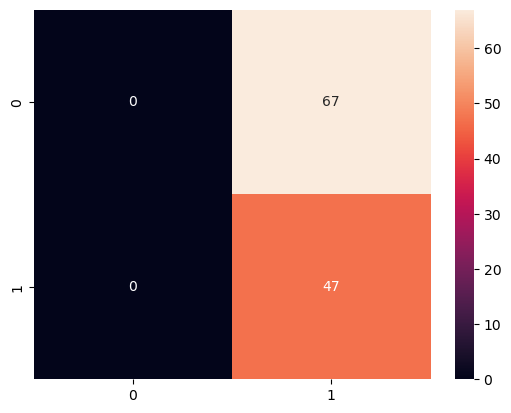

In [51]:
sns.heatmap(cm,annot=True)